In [3]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style
import seaborn as sns

from scipy.stats import zscore                                        # ZSCORE SCALING
from sklearn.preprocessing import StandardScaler                      # ZScore
from sklearn.preprocessing import MinMaxScaler                        # Min Max Scaler

from sklearn.linear_model import LogisticRegression                   # Logistic Regression

from sklearn import metrics, model_selection                          # Evaluation Metrics
from sklearn.metrics import confusion_matrix,classification_report,roc_auc_score,accuracy_score,roc_auc_score,roc_curve, precision_recall_curve

from sklearn.model_selection import train_test_split, GridSearchCV    # Train test Split and Grid Search

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [4]:
df = pd.read_excel('DATA/CompData.xlsx')
df.head()

,Co_Code,Co_Name,_Operating_Expense_Rate,_Research_and_development_expense_rate,_Cash_flow_rate,_Interest_bearing_debt_interest_rate,_Tax_rate_A,_Cash_Flow_Per_Share,_Per_Share_Net_profit_before_tax_Yuan_,_Realized_Sales_Gross_Profit_Growth_Rate,_Operating_Profit_Growth_Rate,_Continuous_Net_Profit_Growth_Rate,_Total_Asset_Growth_Rate,_Net_Value_Growth_Rate,_Total_Asset_Return_Growth_Rate_Ratio,_Cash_Reinvestment_perc,_Current_Ratio,_Quick_Ratio,_Interest_Expense_Ratio,_Total_debt_to_Total_net_worth,_Long_term_fund_suitability_ratio_A,_Net_profit_before_tax_to_Paid_in_capital,_Total_Asset_Turnover,_Accounts_Receivable_Turnover,_Average_Collection_Days,_Inventory_Turnover_Rate_times,_Fixed_Assets_Turnover_Frequency,_Net_Worth_Turnover_Rate_times,_Operating_profit_per_person,_Allocation_rate_per_person,_Quick_Assets_to_Total_Assets,_Cash_to_Total_Assets,_Quick_Assets_to_Current_Liability,_Cash_to_Current_Liability,_Operating_Funds_to_Liability,_Inventory_to_Working_Capital,_Inventory_to_Current_Liability,_Long_term_Liability_to_Current_Assets,_Retained_Earnings_to_Total_Assets,_Total_income_to_Total_expense,_Total_expense_to_Assets,_Current_Asset_Turnover_Rate,_Quick_Asset_Turnover_Rate,_Cash_Turnover_Rate,_Fixed_Assets_to_Assets,_Cash_Flow_to_Total_Assets,_Cash_Flow_to_Liability,_CFO_to_Assets,_Cash_Flow_to_Equity,_Current_Liability_to_Current_Assets,_Liability_Assets_Flag,_Total_assets_to_GNP_price,_No_credit_Interval,_Degree_of_Financial_Leverage_DFL,_Interest_Coverage_Ratio_Interest_expense_to_EBIT,_Net_Income_Flag,_Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.08

### Renaming Column Names

In [5]:
df.columns = [col.lstrip('_') for col in df.columns]
df.head()

,Co_Code,Co_Name,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_perc,Current_Ratio,Quick_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Net_profit_before_tax_to_Paid_in_capital,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_times,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Quick_Assets_to_Current_Liability,Cash_to_Current_Liability,Operating_Funds_to_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,16974,Hind.Cables,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,21214,Tata Tele. Mah.,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,14852,ABG Shipyard,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,2439,GTL,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,23505,Bharati Defence,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000

### Basic Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 58 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Co_Code                                           2058 non-null   int64  
 1   Co_Name                                           2058 non-null   object 
 2   Operating_Expense_Rate                            2058 non-null   float64
 3   Research_and_development_expense_rate             2058 non-null   float64
 4   Cash_flow_rate                                    2058 non-null   float64
 5   Interest_bearing_debt_interest_rate               2058 non-null   float64
 6   Tax_rate_A                                        2058 non-null   float64
 7   Cash_Flow_Per_Share                               1891 non-null   float64
 8   Per_Share_Net_profit_before_tax_Yuan_             2058 non-null   float64
 9   Realized_Sales_Gros

In [7]:
print('Number of Rows(Companies) =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows(Companies) = 2058
Number of Columns = 58


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Co_Code,2058.0,1.757211e+04,2.189289e+04,4.000000,3.674000e+03,6.240000e+03,2.428075e+04,7.249300e+04
Operating_Expense_Rate,2058.0,2.052389e+09,3.252624e+09,0.000100,1.578727e-04,3.330330e-04,4.110000e+09,9.980000e+09
Research_and_development_expense_rate,2058.0,1.208634e+09,2.144568e+09,0.000000,0.000000e+00,1.994130e-04,1.550000e+09,9.980000e+09
Cash_flow_rate,2058.0,4.652426e-01,2.266269e-02,0.000000,4.600991e-01,4.634450e-01,4.680691e-01,1.000000e+00
Interest_bearing_debt_interest_rate,2058.0,1.113022e+07,9.042595e+07,0.000000,2.760280e-04,4.540450e-04,6.630660e-04,9.900000e+08
Tax_rate_A,2058.0,1.147770e-01,1.524457e-01,0.000000,0.000000e+00,3.709890e-02,2.161909e-01,9.996963e-01
Cash_Flow_Per_Share,1891.0,3.199856e-01,1.529979e-02,0.169449,3.149890e-01,3.206479e-01,3.259178e-01,4.622268e-01
Per_Share_Net_profit_before_tax_Yuan_,2058.0,1.769673e-01,3.015730e-02,0.000000,1.666039e-01,1.756421e-01,1.858854e-01,7.923477e-01
Realized_Sales_Gross_Profit_Growth_Rate,2058.0,2.276117e-02,2.170104e-02,0.004282,2.205831e-02,2.210001e-02,2.215200e-02,1.000000e+00
Operating_Profit_Growth_Rate,2058.0,8.481083e-01,4.589093e-03,0.736430,8.479740e-01,8.480386e-01,8.481147e-01,1.000000e+00


In [10]:
df['Default'].value_counts()

0    1838
1     220
Name: Default, dtype: int64

### Missing Value Treatment

In [11]:
df.isnull().sum()

Co_Code                                               0
Co_Name                                               0
Operating_Expense_Rate                                0
Research_and_development_expense_rate                 0
Cash_flow_rate                                        0
Interest_bearing_debt_interest_rate                   0
Tax_rate_A                                            0
Cash_Flow_Per_Share                                 167
Per_Share_Net_profit_before_tax_Yuan_                 0
Realized_Sales_Gross_Profit_Growth_Rate               0
Operating_Profit_Growth_Rate                          0
Continuous_Net_Profit_Growth_Rate                     0
Total_Asset_Growth_Rate                               0
Net_Value_Growth_Rate                                 0
Total_Asset_Return_Growth_Rate_Ratio                  0
Cash_Reinvestment_perc                                0
Current_Ratio                                         0
Quick_Ratio                                     

### Using the Mean as replacement for the missing values

In [12]:
df['Cash_Flow_Per_Share'].fillna(df['Cash_Flow_Per_Share'].mean(), inplace=True)
df['Total_debt_to_Total_net_worth'].fillna(df['Total_debt_to_Total_net_worth'].mean(), inplace=True)
df['Cash_to_Total_Assets'].fillna(df['Cash_to_Total_Assets'].mean(), inplace=True)
df['Current_Liability_to_Current_Assets'].fillna(df['Current_Liability_to_Current_Assets'].mean(), inplace=True)

In [13]:
df.isnull().sum()

Co_Code                                             0
Co_Name                                             0
Operating_Expense_Rate                              0
Research_and_development_expense_rate               0
Cash_flow_rate                                      0
Interest_bearing_debt_interest_rate                 0
Tax_rate_A                                          0
Cash_Flow_Per_Share                                 0
Per_Share_Net_profit_before_tax_Yuan_               0
Realized_Sales_Gross_Profit_Growth_Rate             0
Operating_Profit_Growth_Rate                        0
Continuous_Net_Profit_Growth_Rate                   0
Total_Asset_Growth_Rate                             0
Net_Value_Growth_Rate                               0
Total_Asset_Return_Growth_Rate_Ratio                0
Cash_Reinvestment_perc                              0
Current_Ratio                                       0
Quick_Ratio                                         0
Interest_Expense_Ratio      

### Dropping Unique Identifiers
They do not add any value to the model

In [14]:
df.drop(['Co_Code', 'Co_Name'], axis=1, inplace=True)
df.head()

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Per_Share_Net_profit_before_tax_Yuan_,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Cash_Reinvestment_perc,Current_Ratio,Quick_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Net_profit_before_tax_to_Paid_in_capital,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Net_Worth_Turnover_Rate_times,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Quick_Assets_to_Current_Liability,Cash_to_Current_Liability,Operating_Funds_to_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Total_Assets,Cash_Flow_to_Liability,CFO_to_Assets,Cash_Flow_to_Equity,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Net_Income_Flag,Equity_to_Liability,Default
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.194472,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.369137,0.008324,0.000255,0.631513,0.026006,0.005767,0.192859,0.053973,0.014004,0.000452,7.070000e+08,3.048690e-04,0.029839,0.611689,0.139494,0.176438,0.025626,0.001509,0.000676,0.342391,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.632666,0.458073,0.576869,0.310901,0.034913,0,0.028801,0.620927,0.026930,0.565744,1,0.015338,0
1,9.380000e+09,4.230000e+09,0.460116,0.000716,0.000000,0.315520,0.161633,0.021902,0.839645,0.217360,6.750000e+09,0.000403,0.263714,0.372676,0.006939,0.004787,0.628055,0.006812,0.005230,0.160682,0.056972,0.000306,0.020645,2.782020e-04,8.850000e+09,0.018387,0.386626,0.022805,0.402040,0.004529,0.006584,0.000216,0.337476,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.642967,0.459282,0.551523,0.314572,0.041653,0,0.006191,0.622513,0.026297,0.560741,1,0.029445,1
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.299851,0.172554,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.348860,0.008669,0.005912,0.631688,0.004105,0.005139,0.171548,0.154423,0.001045,0.006048,1.698640e-04,1.490300e-04,0.029839,0.393263,0.012358,0.318921,0.008242,0.006090,0.000458,0.306993,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.644486,0.459700,0.463045,0.314777,0.033560,0,0.001095,0.623749,0.027276,0.566744,1,0.041718,0
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.174738,0.027638,0.848391,0.217662,7.520000e+09,0.000448,0.264766,0.379876,0.017750,0.001738,0.632588,0.007846,0.011960,0.172159,0.101949,0.005411,0.001169,1.340000e+09,1.826942e-03,0.028387,0.439780,0.009049,0.137092,0.053510,0.002437,0.002793,0.343500,0.277630,0.039872,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.656832,0.461860,0.577212,0.316974,0.016527,0,0.003749,0.622963,0.026988,0.565950,1,0.026956,0
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.176546,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.389609,0.008427,0.003967,0.632682,0.013671,0.005822,0.175598,0.163418,0.000814,0.007776,1.341330e-04,8.298780e-04,0.052258,0.392766,0.002069,0.739193,0.082328,0.007271,0.002376,0.345796,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-04,5.670000e+09,0.103303,0.656549,0.461238,0.594038,0.31

### Identifying Outliers

<AxesSubplot:xlabel='Operating_Expense_Rate'>

Text(0.5, 1.0, 'Box plot - Operating_Expense_Rate')

Text(0.5, 0, 'Operating_Expense_Rate')

<AxesSubplot:xlabel='Research_and_development_expense_rate'>

Text(0.5, 1.0, 'Box plot - Research_and_development_expense_rate')

Text(0.5, 0, 'Research_and_development_expense_rate')

<AxesSubplot:xlabel='Cash_flow_rate'>

Text(0.5, 1.0, 'Box plot - Cash_flow_rate')

Text(0.5, 0, 'Cash_flow_rate')

<AxesSubplot:xlabel='Interest_bearing_debt_interest_rate'>

Text(0.5, 1.0, 'Box plot - Interest_bearing_debt_interest_rate')

Text(0.5, 0, 'Interest_bearing_debt_interest_rate')

<AxesSubplot:xlabel='Tax_rate_A'>

Text(0.5, 1.0, 'Box plot - Tax_rate_A')

Text(0.5, 0, 'Tax_rate_A')

<AxesSubplot:xlabel='Cash_Flow_Per_Share'>

Text(0.5, 1.0, 'Box plot - Cash_Flow_Per_Share')

Text(0.5, 0, 'Cash_Flow_Per_Share')

<AxesSubplot:xlabel='Per_Share_Net_profit_before_tax_Yuan_'>

Text(0.5, 1.0, 'Box plot - Per_Share_Net_profit_before_tax_Yuan_')

Text(0.5, 0, 'Per_Share_Net_profit_before_tax_Yuan_')

<AxesSubplot:xlabel='Realized_Sales_Gross_Profit_Growth_Rate'>

Text(0.5, 1.0, 'Box plot - Realized_Sales_Gross_Profit_Growth_Rate')

Text(0.5, 0, 'Realized_Sales_Gross_Profit_Growth_Rate')

<AxesSubplot:xlabel='Operating_Profit_Growth_Rate'>

Text(0.5, 1.0, 'Box plot - Operating_Profit_Growth_Rate')

Text(0.5, 0, 'Operating_Profit_Growth_Rate')

<AxesSubplot:xlabel='Continuous_Net_Profit_Growth_Rate'>

Text(0.5, 1.0, 'Box plot - Continuous_Net_Profit_Growth_Rate')

Text(0.5, 0, 'Continuous_Net_Profit_Growth_Rate')

<AxesSubplot:xlabel='Total_Asset_Growth_Rate'>

Text(0.5, 1.0, 'Box plot - Total_Asset_Growth_Rate')

Text(0.5, 0, 'Total_Asset_Growth_Rate')

<AxesSubplot:xlabel='Net_Value_Growth_Rate'>

Text(0.5, 1.0, 'Box plot - Net_Value_Growth_Rate')

Text(0.5, 0, 'Net_Value_Growth_Rate')

<AxesSubplot:xlabel='Total_Asset_Return_Growth_Rate_Ratio'>

Text(0.5, 1.0, 'Box plot - Total_Asset_Return_Growth_Rate_Ratio')

Text(0.5, 0, 'Total_Asset_Return_Growth_Rate_Ratio')

<AxesSubplot:xlabel='Cash_Reinvestment_perc'>

Text(0.5, 1.0, 'Box plot - Cash_Reinvestment_perc')

Text(0.5, 0, 'Cash_Reinvestment_perc')

<AxesSubplot:xlabel='Current_Ratio'>

Text(0.5, 1.0, 'Box plot - Current_Ratio')

Text(0.5, 0, 'Current_Ratio')

<AxesSubplot:xlabel='Quick_Ratio'>

Text(0.5, 1.0, 'Box plot - Quick_Ratio')

Text(0.5, 0, 'Quick_Ratio')

<AxesSubplot:xlabel='Interest_Expense_Ratio'>

Text(0.5, 1.0, 'Box plot - Interest_Expense_Ratio')

Text(0.5, 0, 'Interest_Expense_Ratio')

<AxesSubplot:xlabel='Total_debt_to_Total_net_worth'>

Text(0.5, 1.0, 'Box plot - Total_debt_to_Total_net_worth')

Text(0.5, 0, 'Total_debt_to_Total_net_worth')

<AxesSubplot:xlabel='Long_term_fund_suitability_ratio_A'>

Text(0.5, 1.0, 'Box plot - Long_term_fund_suitability_ratio_A')

Text(0.5, 0, 'Long_term_fund_suitability_ratio_A')

<AxesSubplot:xlabel='Net_profit_before_tax_to_Paid_in_capital'>

Text(0.5, 1.0, 'Box plot - Net_profit_before_tax_to_Paid_in_capital')

Text(0.5, 0, 'Net_profit_before_tax_to_Paid_in_capital')

<AxesSubplot:xlabel='Total_Asset_Turnover'>

Text(0.5, 1.0, 'Box plot - Total_Asset_Turnover')

Text(0.5, 0, 'Total_Asset_Turnover')

<AxesSubplot:xlabel='Accounts_Receivable_Turnover'>

Text(0.5, 1.0, 'Box plot - Accounts_Receivable_Turnover')

Text(0.5, 0, 'Accounts_Receivable_Turnover')

<AxesSubplot:xlabel='Average_Collection_Days'>

Text(0.5, 1.0, 'Box plot - Average_Collection_Days')

Text(0.5, 0, 'Average_Collection_Days')

<AxesSubplot:xlabel='Inventory_Turnover_Rate_times'>

Text(0.5, 1.0, 'Box plot - Inventory_Turnover_Rate_times')

Text(0.5, 0, 'Inventory_Turnover_Rate_times')

<AxesSubplot:xlabel='Fixed_Assets_Turnover_Frequency'>

Text(0.5, 1.0, 'Box plot - Fixed_Assets_Turnover_Frequency')

Text(0.5, 0, 'Fixed_Assets_Turnover_Frequency')

<AxesSubplot:xlabel='Net_Worth_Turnover_Rate_times'>

Text(0.5, 1.0, 'Box plot - Net_Worth_Turnover_Rate_times')

Text(0.5, 0, 'Net_Worth_Turnover_Rate_times')

<AxesSubplot:xlabel='Operating_profit_per_person'>

Text(0.5, 1.0, 'Box plot - Operating_profit_per_person')

Text(0.5, 0, 'Operating_profit_per_person')

<AxesSubplot:xlabel='Allocation_rate_per_person'>

Text(0.5, 1.0, 'Box plot - Allocation_rate_per_person')

Text(0.5, 0, 'Allocation_rate_per_person')

<AxesSubplot:xlabel='Quick_Assets_to_Total_Assets'>

Text(0.5, 1.0, 'Box plot - Quick_Assets_to_Total_Assets')

Text(0.5, 0, 'Quick_Assets_to_Total_Assets')

<AxesSubplot:xlabel='Cash_to_Total_Assets'>

Text(0.5, 1.0, 'Box plot - Cash_to_Total_Assets')

Text(0.5, 0, 'Cash_to_Total_Assets')

<AxesSubplot:xlabel='Quick_Assets_to_Current_Liability'>

Text(0.5, 1.0, 'Box plot - Quick_Assets_to_Current_Liability')

Text(0.5, 0, 'Quick_Assets_to_Current_Liability')

<AxesSubplot:xlabel='Cash_to_Current_Liability'>

Text(0.5, 1.0, 'Box plot - Cash_to_Current_Liability')

Text(0.5, 0, 'Cash_to_Current_Liability')

<AxesSubplot:xlabel='Operating_Funds_to_Liability'>

Text(0.5, 1.0, 'Box plot - Operating_Funds_to_Liability')

Text(0.5, 0, 'Operating_Funds_to_Liability')

<AxesSubplot:xlabel='Inventory_to_Working_Capital'>

Text(0.5, 1.0, 'Box plot - Inventory_to_Working_Capital')

Text(0.5, 0, 'Inventory_to_Working_Capital')

<AxesSubplot:xlabel='Inventory_to_Current_Liability'>

Text(0.5, 1.0, 'Box plot - Inventory_to_Current_Liability')

Text(0.5, 0, 'Inventory_to_Current_Liability')

<AxesSubplot:xlabel='Long_term_Liability_to_Current_Assets'>

Text(0.5, 1.0, 'Box plot - Long_term_Liability_to_Current_Assets')

Text(0.5, 0, 'Long_term_Liability_to_Current_Assets')

<AxesSubplot:xlabel='Retained_Earnings_to_Total_Assets'>

Text(0.5, 1.0, 'Box plot - Retained_Earnings_to_Total_Assets')

Text(0.5, 0, 'Retained_Earnings_to_Total_Assets')

<AxesSubplot:xlabel='Total_income_to_Total_expense'>

Text(0.5, 1.0, 'Box plot - Total_income_to_Total_expense')

Text(0.5, 0, 'Total_income_to_Total_expense')

<AxesSubplot:xlabel='Total_expense_to_Assets'>

Text(0.5, 1.0, 'Box plot - Total_expense_to_Assets')

Text(0.5, 0, 'Total_expense_to_Assets')

<AxesSubplot:xlabel='Current_Asset_Turnover_Rate'>

Text(0.5, 1.0, 'Box plot - Current_Asset_Turnover_Rate')

Text(0.5, 0, 'Current_Asset_Turnover_Rate')

<AxesSubplot:xlabel='Quick_Asset_Turnover_Rate'>

Text(0.5, 1.0, 'Box plot - Quick_Asset_Turnover_Rate')

Text(0.5, 0, 'Quick_Asset_Turnover_Rate')

<AxesSubplot:xlabel='Cash_Turnover_Rate'>

Text(0.5, 1.0, 'Box plot - Cash_Turnover_Rate')

Text(0.5, 0, 'Cash_Turnover_Rate')

<AxesSubplot:xlabel='Fixed_Assets_to_Assets'>

Text(0.5, 1.0, 'Box plot - Fixed_Assets_to_Assets')

Text(0.5, 0, 'Fixed_Assets_to_Assets')

<AxesSubplot:xlabel='Cash_Flow_to_Total_Assets'>

Text(0.5, 1.0, 'Box plot - Cash_Flow_to_Total_Assets')

Text(0.5, 0, 'Cash_Flow_to_Total_Assets')

<AxesSubplot:xlabel='Cash_Flow_to_Liability'>

Text(0.5, 1.0, 'Box plot - Cash_Flow_to_Liability')

Text(0.5, 0, 'Cash_Flow_to_Liability')

<AxesSubplot:xlabel='CFO_to_Assets'>

Text(0.5, 1.0, 'Box plot - CFO_to_Assets')

Text(0.5, 0, 'CFO_to_Assets')

<AxesSubplot:xlabel='Cash_Flow_to_Equity'>

Text(0.5, 1.0, 'Box plot - Cash_Flow_to_Equity')

Text(0.5, 0, 'Cash_Flow_to_Equity')

<AxesSubplot:xlabel='Current_Liability_to_Current_Assets'>

Text(0.5, 1.0, 'Box plot - Current_Liability_to_Current_Assets')

Text(0.5, 0, 'Current_Liability_to_Current_Assets')

<AxesSubplot:xlabel='Total_assets_to_GNP_price'>

Text(0.5, 1.0, 'Box plot - Total_assets_to_GNP_price')

Text(0.5, 0, 'Total_assets_to_GNP_price')

<AxesSubplot:xlabel='No_credit_Interval'>

Text(0.5, 1.0, 'Box plot - No_credit_Interval')

Text(0.5, 0, 'No_credit_Interval')

<AxesSubplot:xlabel='Degree_of_Financial_Leverage_DFL'>

Text(0.5, 1.0, 'Box plot - Degree_of_Financial_Leverage_DFL')

Text(0.5, 0, 'Degree_of_Financial_Leverage_DFL')

<AxesSubplot:xlabel='Interest_Coverage_Ratio_Interest_expense_to_EBIT'>

Text(0.5, 1.0, 'Box plot - Interest_Coverage_Ratio_Interest_expense_to_EBIT')

Text(0.5, 0, 'Interest_Coverage_Ratio_Interest_expense_to_EBIT')

<AxesSubplot:xlabel='Equity_to_Liability'>

Text(0.5, 1.0, 'Box plot - Equity_to_Liability')

Text(0.5, 0, 'Equity_to_Liability')

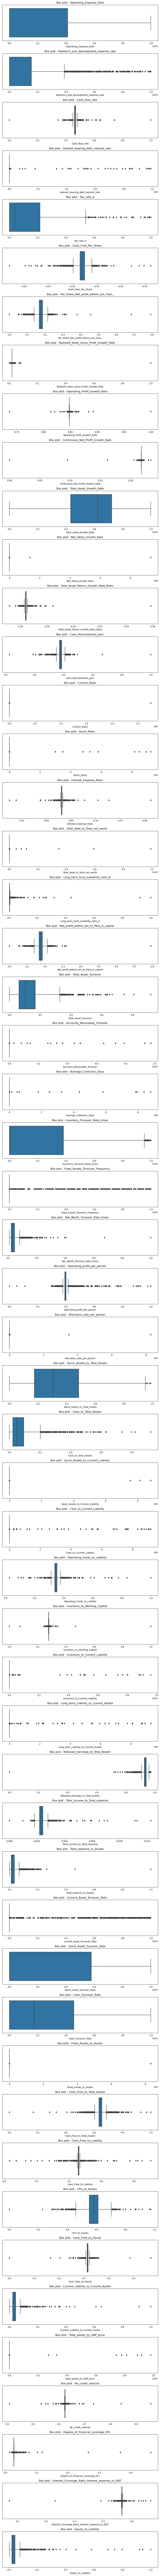

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='float64').columns

# Create subplots
fig, ax = plt.subplots(len(numeric_cols), figsize=(10, 3 * len(numeric_cols)))

# Iterate through numeric columns and create box plots
for i, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=ax[i])
    ax[i].set_title(f'Box plot - {col}', fontsize=12)
    ax[i].set_xlabel(col, fontsize=10)

# Adjust layout and display
plt.tight_layout()
plt.show()

#### Each of the numeric variable has outliers therefore we have to do the outlier treatment

### Outlier Treatment using IQR method

In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [17]:
df_x = df.drop('Default', axis=1)
df_y = df['Default']

In [18]:
for column in df_x.columns:
    lr,ur=remove_outlier(df_x[column])
    df_x[column]=np.where(df_x[column]>ur,ur,df_x[column])
    df_x[column]=np.where(df_x[column]<lr,lr,df_x[column])

In [19]:
df = pd.concat([df_x, df_y], axis = 1)

In [20]:
print('Number of Rows(Companies) =', df.shape[0])
print('Number of Columns =', df.shape[1])

Number of Rows(Companies) = 2058
Number of Columns = 56


### Correlation Heatmap

<Figure size 4000x4000 with 0 Axes>

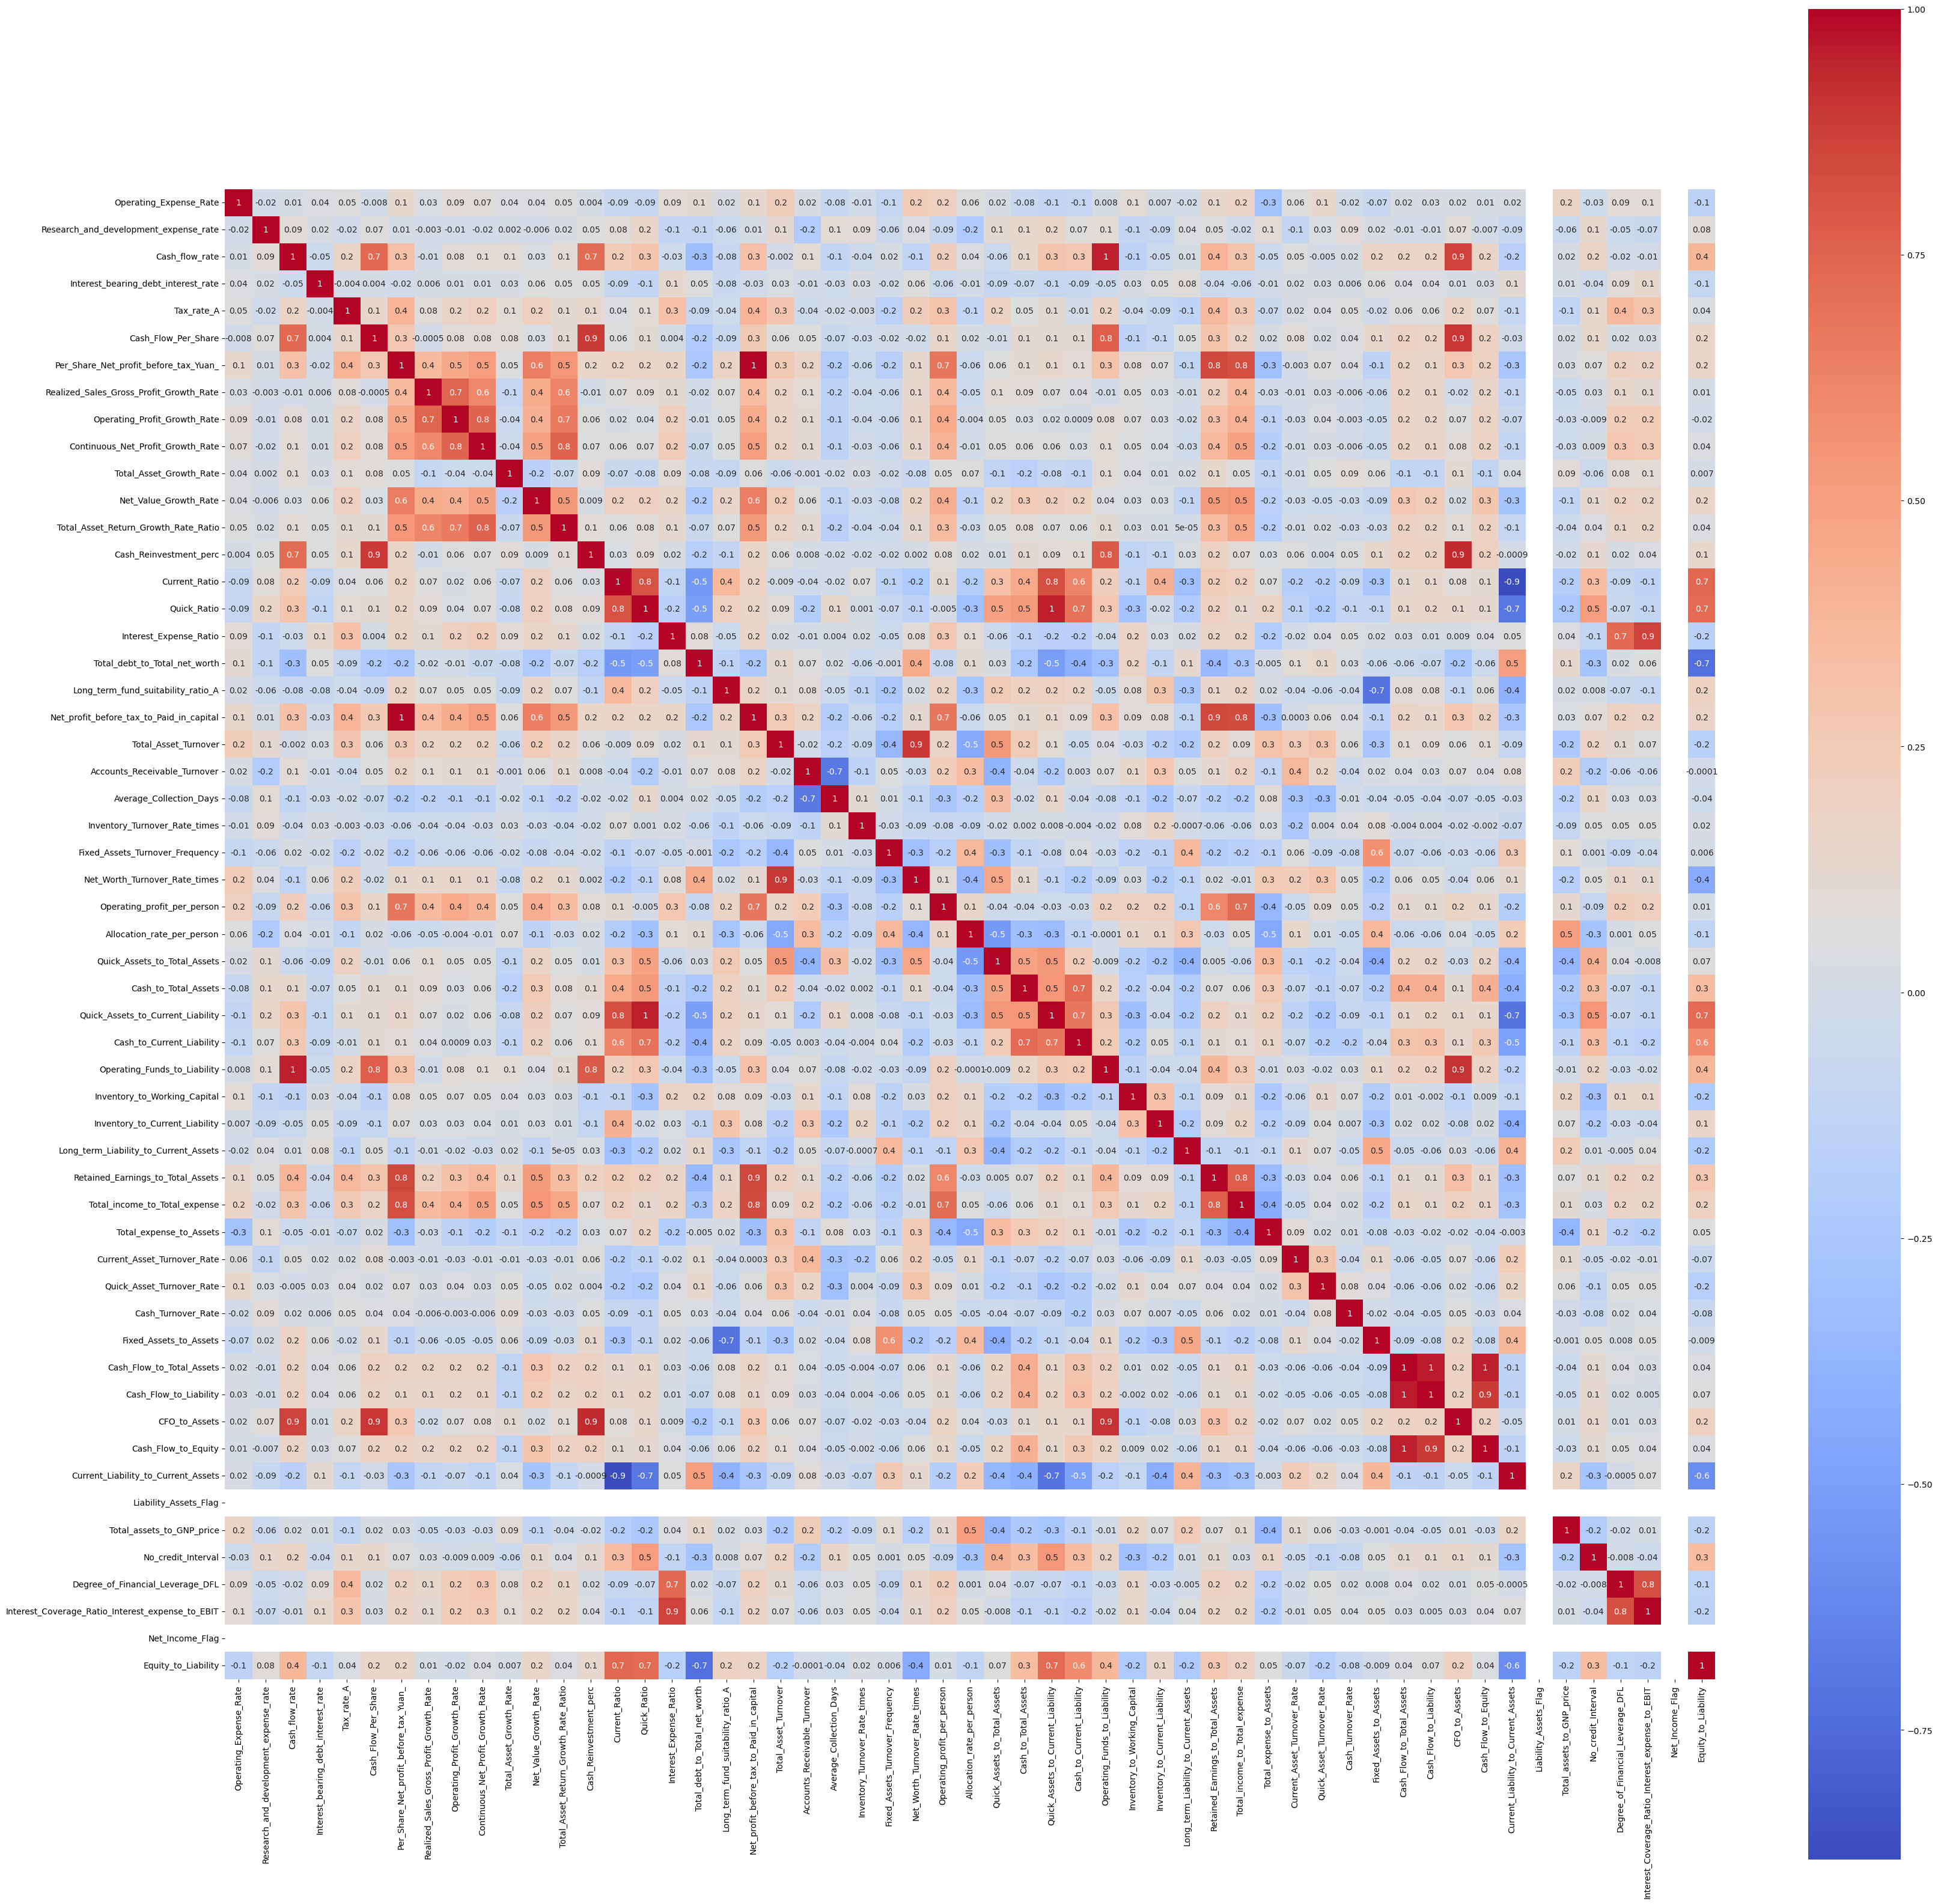

In [21]:
#calculate column correlations and make a seaborn heatmap - Before standardisation

plt.figure(figsize=(40,40))
p=sns.heatmap(df_x.corr(), annot=True,cmap='coolwarm',square=True, fmt='.1g')

* We see a lot of red patches showing high correlation between variables
* This gives rise to issues of Multi-Collinearity
* Lets check for Multi-Collinearity using Variance Inflation Factor

### Check Multi-Colinearity using Variance Inflation Factor

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [23]:
X = df_x.copy()
f = calc_vif(X).sort_values(by = 'VIF', ascending = False)
f

,variables,VIF
6,Per_Share_Net_profit_before_tax_Yuan_,100.472026
19,Net_profit_before_tax_to_Paid_in_capital,99.741030
43,Cash_Flow_to_Total_Assets,44.483284
45,CFO_to_Assets,28.706271
32,Operating_Funds_to_Liability,21.594695
30,Quick_Assets_to_Current_Liability,19.819247
44,Cash_Flow_to_Liability,17.839727
2,Cash_flow_rate,16.480736
46,Cash_Flow_to_Equity,15.125460
14,Current_Ratio,14.598460


In [24]:
X.shape
X.columns

(2058, 55)

Index(['Operating_Expense_Rate', 'Research_and_development_expense_rate', 'Cash_flow_rate', 'Interest_bearing_debt_interest_rate', 'Tax_rate_A', 'Cash_Flow_Per_Share', 'Per_Share_Net_profit_before_tax_Yuan_', 'Realized_Sales_Gross_Profit_Growth_Rate', 'Operating_Profit_Growth_Rate', 'Continuous_Net_Profit_Growth_Rate', 'Total_Asset_Growth_Rate', 'Net_Value_Growth_Rate', 'Total_Asset_Return_Growth_Rate_Ratio', 'Cash_Reinvestment_perc', 'Current_Ratio', 'Quick_Ratio', 'Interest_Expense_Ratio', 'Total_debt_to_Total_net_worth', 'Long_term_fund_suitability_ratio_A', 'Net_profit_before_tax_to_Paid_in_capital', 'Total_Asset_Turnover', 'Accounts_Receivable_Turnover', 'Average_Collection_Days', 'Inventory_Turnover_Rate_times', 'Fixed_Assets_Turnover_Frequency', 'Net_Worth_Turnover_Rate_times', 'Operating_profit_per_person', 'Allocation_rate_per_person', 'Quick_Assets_to_Total_Assets', 'Cash_to_Total_Assets', 'Quick_Assets_to_Current_Liability', 'Cash_to_Current_Liability',
       'Operating_Fun

### Dropping Variables recursively with VIF greater than 5

* We check VIF of all predictor variables
* We arrange these variables in decreasing order of VIF
* We check if the top variable has VIF > 5
* If yes, then we drop ONLY this Top Variable and check for VIF again
* We run this in a loop and drop variables one by one till we get max VIF < 5

In [25]:
for i in range(55):
    v = calc_vif(X).sort_values(by = 'VIF', ascending = False)
    if (v.iloc[0,1] > 5):
        X = X.drop(columns=v.iloc[0,0])


In [26]:
calc_vif(X).sort_values(by = 'VIF', ascending = False)

,variables,VIF
22,Quick_Assets_to_Total_Assets,4.773525
34,Fixed_Assets_to_Assets,4.577587
29,Total_income_to_Total_expense,4.251145
36,Current_Liability_to_Current_Assets,3.994267
42,Equity_to_Liability,3.967156
28,Retained_Earnings_to_Total_Assets,3.697288
7,Operating_Profit_Growth_Rate,3.610019
24,Cash_to_Current_Liability,3.566724
15,Total_Asset_Turnover,3.481024
8,Continuous_Net_Profit_Growth_Rate,3.431327


In [27]:
X.shape
X.head()

(2058, 43)

,Operating_Expense_Rate,Research_and_development_expense_rate,Cash_flow_rate,Interest_bearing_debt_interest_rate,Tax_rate_A,Cash_Flow_Per_Share,Realized_Sales_Gross_Profit_Growth_Rate,Operating_Profit_Growth_Rate,Continuous_Net_Profit_Growth_Rate,Total_Asset_Growth_Rate,Net_Value_Growth_Rate,Total_Asset_Return_Growth_Rate_Ratio,Interest_Expense_Ratio,Total_debt_to_Total_net_worth,Long_term_fund_suitability_ratio_A,Total_Asset_Turnover,Accounts_Receivable_Turnover,Average_Collection_Days,Inventory_Turnover_Rate_times,Fixed_Assets_Turnover_Frequency,Operating_profit_per_person,Allocation_rate_per_person,Quick_Assets_to_Total_Assets,Cash_to_Total_Assets,Cash_to_Current_Liability,Inventory_to_Working_Capital,Inventory_to_Current_Liability,Long_term_Liability_to_Current_Assets,Retained_Earnings_to_Total_Assets,Total_income_to_Total_expense,Total_expense_to_Assets,Current_Asset_Turnover_Rate,Quick_Asset_Turnover_Rate,Cash_Turnover_Rate,Fixed_Assets_to_Assets,Cash_Flow_to_Liability,Current_Liability_to_Current_Assets,Liability_Assets_Flag,Total_assets_to_GNP_price,No_credit_Interval,Degree_of_Financial_Leverage_DFL,Net_Income_Flag,Equity_to_Liability
0,8.820000e+09,0.000000e+00,0.462045,0.000352,0.001417,0.322558,0.022074,0.848021,0.217590,7.500000e+09,0.000441,0.263902,0.631513,0.026006,0.005767,0.053973,0.003519,0.000452,7.070000e+08,0.000305,0.415152,0.054430,0.176438,0.025626,0.000676,0.278434,0.017945,0.003064,0.937630,0.002687,0.007059,0.000732,1.420410e-04,5.470000e+09,0.094270,0.458073,0.034913,0.0,0.016143,0.622251,0.026930,1.0,0.015338
1,9.380000e+09,3.875000e+09,0.460116,0.000716,0.000000,0.315520,0.021918,0.847763,0.217506,6.750000e+09,0.000403,0.263714,0.628913,0.006812,0.005230,0.056972,0.000306,0.016233,2.782020e-04,0.020716,0.386626,0.022805,0.402040,0.004529,0.000216,0.277221,0.001271,0.004813,0.926251,0.002044,0.015441,0.000301,2.985590e-04,8.820000e+08,0.351895,0.459282,0.041653,0.0,0.006191,0.622513,0.026395,1.0,0.029445
2,3.800000e+09,8.150000e+08,0.449893,0.000496,0.000000,0.301182,0.022186,0.848196,0.217573,9.680000e+09,0.000452,0.264095,0.631688,0.004105,0.005139,0.154423,0.001045,0.006048,1.698640e-04,0.000149,0.393263,0.012358,0.318921,0.008242,0.000458,0.277473,0.007012,0.000000,0.933155,0.002324,0.009771,0.000127,9.410000e+08,6.790000e+08,0.463276,0.459700,0.033560,0.0,0.001095,0.623749,0.027276,1.0,0.041718
3,6.440000e+09,0.000000e+00,0.462731,0.000592,0.009313,0.319834,0.022293,0.848326,0.217662,7.520000e+09,0.000448,0.264766,0.632588,0.007846,0.008295,0.101949,0.003519,0.001169,1.340000e+09,0.001827,0.415152,0.009049,0.137092,0.053510,0.002793,0.277630,0.027542,0.004472,0.928037,0.002334,0.013607,0.000401,5.310000e+09,6.020000e+09,0.026433,0.461860,0.016527,0.0,0.003749,0.622963,0.026988,1.0,0.026956
4,3.680000e+09,0.000000e+00,0.463117,0.000782,0.400243,0.325104,0.022072,0.847987,0.217589,7.120000e+09,0.000454,0.263966,0.632682,0.013671,0.005822,0.163418,0.000814,0.007776,1.341330e-04,0.000830,0.392766,0.002069,0.739193,0.082328,0.002376,0.277235,0.003342,0.000000,0.934421,0.002310,0.010493,0.000208,1.892020e-04,5.670000e+09,0.103303,0.461238,0.034497,0.0,0.006595,0.624419,0.027410,1.0,0.019900


### Split the whole data into Train and Test 67-33

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, df_y, 
                                                    test_size = 0.33, random_state=42)

In [29]:
X_train.shape


(1378, 43)

In [30]:
X_test.shape

(680, 43)

In [31]:
#### For modeling we will use Logistic Regression with recursive feature elimination
#from sklearn.feature_selection import RFE

#LogR = LogisticRegression()

#selector = RFE(estimator = LogR, n_features_to_select=10, step=1)

#selector = selector.fit(X_train, y_train)

#df_rank = pd.DataFrame({'Feature': X.columns, 'Rank': selector.ranking_})

In [32]:
#df_rank.sort_values(by='Rank')

In [33]:
#pred_train = selector.predict(X_train)
#pred_test = selector.predict(X_test)

#print(confusion_matrix(y_train, pred_train))

#print(classification_report(y_train, pred_train))

In [34]:
#print(confusion_matrix(y_test, pred_test))

#print(classification_report(y_test, pred_test))

In [35]:
#from sklearn.feature_selection import RFE
#from sklearn.linear_model import LogisticRegression
#from sklearn.pipeline import Pipeline
#import pandas as pd

# Create a logistic regression classifier
#logreg = LogisticRegression()

# Create a pipeline with the logistic regression model
# and RFE feature selection
#pipeline = Pipeline([('classifier', logreg)])
#pipeline.fit(X_train, y_train)  # Fit the entire pipeline

# Recursive Feature Elimination
#rfe = RFE(
#    estimator=pipeline.named_steps['classifier'],
#    n_features_to_select=15)  # Here, 10 is the number of features to select
#rfe = rfe.fit(X_train, y_train)

# Print out the selected features
#selected_features = X.columns[rfe.support_]
#print(selected_features)

In [36]:
# Fit logistic regression model using sklearn
#logreg_model = LogisticRegression()
#logreg_model.fit(X_train, y_train)

# Print the coefficients
#print("Coefficients:", logreg_model.coef_)

# Make predictions on the test set
#y_pred = logreg_model.predict(X_test)

# Evaluate the model performance (you can use metrics like accuracy, precision, recall, etc.)
#from sklearn.metrics import accuracy_score, classification_report
#print("Accuracy:", accuracy_score(y_test, y_pred))
#print("Classification Report:\n", classification_report(y_test, y_pred))

In [37]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model_LR.fit(X_train,y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_linesearch.py:305: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/Users/abz/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    1.2s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

#### Training the Model

In [38]:
lr_pred_train = model_LR.predict(X_train)
lr_pred_test = model_LR.predict(X_test)

print(confusion_matrix(y_train, lr_pred_train))

print(classification_report(y_train, lr_pred_train))


[[1212   13]
 [ 152    1]]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1225
           1       0.07      0.01      0.01       153

    accuracy                           0.88      1378
   macro avg       0.48      0.50      0.47      1378
weighted avg       0.80      0.88      0.83      1378



#### Testing the Model

In [39]:
print(confusion_matrix(y_test, lr_pred_test))

print(classification_report(y_test, lr_pred_test))

[[606   7]
 [ 67   0]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       613
           1       0.00      0.00      0.00        67

    accuracy                           0.89       680
   macro avg       0.45      0.49      0.47       680
weighted avg       0.81      0.89      0.85       680



### Random Forest


In [40]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100,random_state=42)
RF_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

#### Training the Model

In [41]:
y_train_predict= RF_model.predict(X_train)
model_train_score = RF_model.score(X_train,y_train)
print (model_train_score)
print (metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

1.0
[[1225    0]
 [   0  153]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       153

    accuracy                           1.00      1378
   macro avg       1.00      1.00      1.00      1378
weighted avg       1.00      1.00      1.00      1378



#### Testing the Model

In [42]:
y_test_predict= RF_model.predict(X_test)
model_test_score = RF_model.score(X_test,y_test)
print (model_test_score)
print (metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9235294117647059
[[599  14]
 [ 38  29]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       613
           1       0.67      0.43      0.53        67

    accuracy                           0.92       680
   macro avg       0.81      0.70      0.74       680
weighted avg       0.91      0.92      0.92       680



### Linear Discriminant Analysis


In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_Model = LinearDiscriminantAnalysis()
LDA_Model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

#### Training the Model

In [44]:
y_train_predict= LDA_Model.predict(X_train)
model_train_score = LDA_Model.score(X_train,y_train)
print (model_train_score)
print (metrics.confusion_matrix(y_train,y_train_predict))
print(metrics.classification_report(y_train,y_train_predict))

0.9136429608127722
[[1174   51]
 [  68   85]]
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1225
           1       0.62      0.56      0.59       153

    accuracy                           0.91      1378
   macro avg       0.79      0.76      0.77      1378
weighted avg       0.91      0.91      0.91      1378



#### Testing the Model

In [45]:
y_test_predict= LDA_Model.predict(X_test)
model_test_score = LDA_Model.score(X_test,y_test)
print (model_test_score)
print (metrics.confusion_matrix(y_test,y_test_predict))
print(metrics.classification_report(y_test,y_test_predict))

0.9102941176470588
[[579  34]
 [ 27  40]]
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       613
           1       0.54      0.60      0.57        67

    accuracy                           0.91       680
   macro avg       0.75      0.77      0.76       680
weighted avg       0.91      0.91      0.91       680



<Figure size 800x600 with 0 Axes>

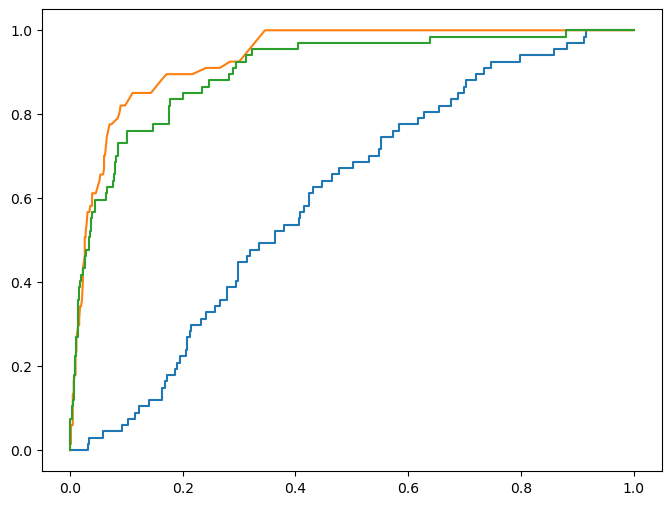

In [46]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities
lr_probs = model_LR.predict_proba(X_test)[:, 1]
rf_probs = RF_model.predict_proba(X_test)[:, 1]
lda_probs = LDA_Model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC for each model
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_probs)

lr_auc = auc(lr_fpr, lr_tpr)
rf_auc = auc(rf_fpr, rf_tpr)
lda_auc = auc(lda_fpr, lda_tpr)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(lr_fpr, lr_tpr, label=f'Logistic Regression (AUC = {lr_auc:.2f})')
plt.plot(rf_fpr, rf_tpr, label=f'Random Forest (AUC = {rf_auc:.2f})')
plt.plot(lda_fpr, lda_tpr, label=f'LDA (AUC = {lda_auc:.2f})')
